# Obteniendo clusters optimos con el método de elbow

In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [2]:
X = pnd.read_csv("hogares-clean-no-99.csv")
X.head()


,Unnamed: 0,VIV_SEL,HOGAR,N_INF,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_1_6,...,P5_6_6,P5_6_7,P5_10_1,P5_10_2,P5_10_3,CD_ENDUTIH,ENT,FAC_HOG,UPM_DIS,EST_DIS
0,0,1,1,2,1,1,1,1,1,2,...,2,2,1,2,1,14,1,144,1,3
1,1,2,1,1,2,1,2,1,1,2,...,2,1,1,1,3,14,1,144,1,3
2,2,3,1,1,1,1,1,1,1,1,...,2,2,1,2,1,14,1,144,1,3
3,3,4,1,1,2,2,2,2,1,2,...,2,1,1,3,3,14,1,144,1,3
4,4,4,2,1,2,2,2,2,1,2,...,2,1,1,3,3,14,1,144,1,3


## quitamos columnas no categóricas

In [3]:
X.drop('Unnamed: 0', 1, inplace=True)
X.drop('EST_DIS', 1, inplace=True)
X.drop('UPM_DIS', 1, inplace=True)
X.drop('FAC_HOG', 1, inplace=True)
X.drop('VIV_SEL', 1, inplace=True)
X.head()

,HOGAR,N_INF,P4_1_1,P4_1_2,P4_1_3,P4_1_4,P4_1_5,P4_1_6,P4_2_1,P4_2_2,...,P5_6_3,P5_6_4,P5_6_5,P5_6_6,P5_6_7,P5_10_1,P5_10_2,P5_10_3,CD_ENDUTIH,ENT
0,1,2,1,1,1,1,1,2,1,2,...,2,1,1,2,2,1,2,1,14,1
1,1,1,2,1,2,1,1,2,2,1,...,2,2,1,2,1,1,1,3,14,1
2,1,1,1,1,1,1,1,1,2,2,...,2,1,1,2,2,1,2,1,14,1
3,1,1,2,2,2,2,1,2,2,2,...,2,2,2,2,1,1,3,3,14,1
4,2,1,2,2,2,2,1,2,2,1,...,2,2,2,2,1,1,3,3,14,1


In [4]:
X.shape

(135341, 34)

## normalizamos los datos

In [5]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

# Obteniendo clusters optimos con el método de elbow

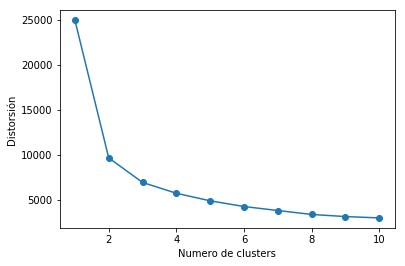

In [6]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()


## aplicando algoritmo mean-shift

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [11]:
bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 2


In [13]:
import matplotlib.pyplot as plt
from itertools import cycle

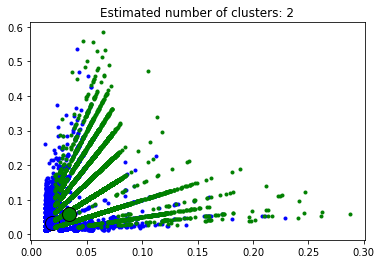

In [14]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## kmeans

In [15]:
clusters = KMeans(n_clusters=2,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

In [16]:
y_km = clusters.fit_predict(X)
y_km

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

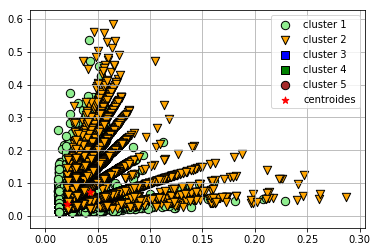

In [17]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(X[y_km==4,0],
          X[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [18]:
from collections import Counter

In [19]:
Counter(y_km).keys() 

dict_keys([0, 1])

In [20]:
Counter(y_km).values()

dict_values([94045, 41296])